In [18]:
import pandas as pd
from ydata_profiling import ProfileReport

In [19]:
# Carga y asignacion de la base de datos
df = pd.read_csv('bezdekIris.csv')
profile = ProfileReport(df, title="Profiling Report")

In [20]:
df.head()

,sepal_length\t,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# Importar las librerias para el clustering por K-means
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [22]:
# Carga y visualizacion de los datos
iris = load_iris()

iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# Impresion de los clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, random_state=0)
kmeans.fit(iris.data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [24]:
# Asignacion de los labels para los clusters
iris_df['cluster'] = kmeans.labels_
# Visualizacion de la distribucion del cluster
iris_df.groupby(['target', 'cluster']).agg({'sepal length (cm)':'count'})

sepal length (cm)
target cluster                   
0      1                       50
1      0                       47
       2                        3
2      0                       14
       2                       36

In [25]:
# Asignacion de los puntos en el espacio bidimensianal para su posterior graficacion
from sklearn.decomposition import PCA

pca = PCA(2)
pca_res = pca.fit_transform(iris.data)
iris_df['X'] = pca_res[:, 0]
iris_df['Y'] = pca_res[:, 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,X,Y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


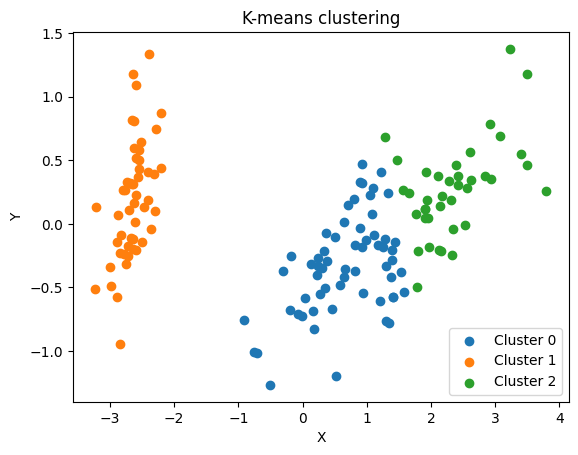

In [26]:
# Visualizacion de los clusters.

# Se importa de la libreria compatible con JupyterLab para la graficacion del cluster
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

# Asignacion de los clusters
cluster_0 = iris_df[iris_df['cluster'] == 0]
cluster_1 = iris_df[iris_df['cluster'] == 1]
cluster_2 = iris_df[iris_df['cluster'] == 2]

# Labeling de los clusters
plt.scatter(cluster_0['X'], cluster_0['Y'], label='Cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], label='Cluster 1')
plt.scatter(cluster_2['X'], cluster_2['Y'], label='Cluster 2')

plt.legend()
plt.title('K-means clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [27]:
# Mostrar profiling
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
# Convertir archivo del profiling a HTML
profile.to_file(".\ReporteKMeans.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

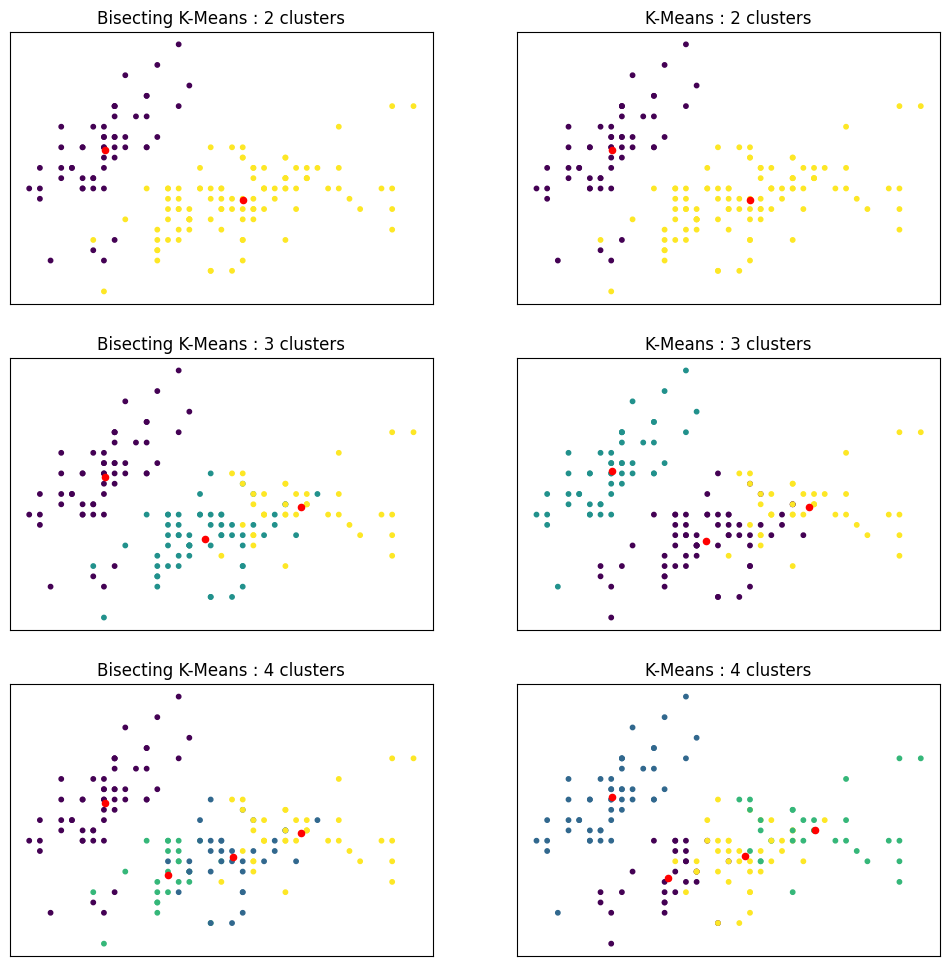

In [29]:
# Ejemplo 1

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.datasets import load_iris

# Cargar dataset de iris
iris = load_iris()
X = iris.data

# Numero de clusters para KMeans and BisectingKMeans
n_clusters_list = [2, 3, 4]

# Algoritmos a comparar
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Subplots para cada variante
fig, axs = plt.subplots(
    len(n_clusters_list), len(clustering_algorithms), figsize=(12, 12)
)

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=0, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")

# Esconder los ejes
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

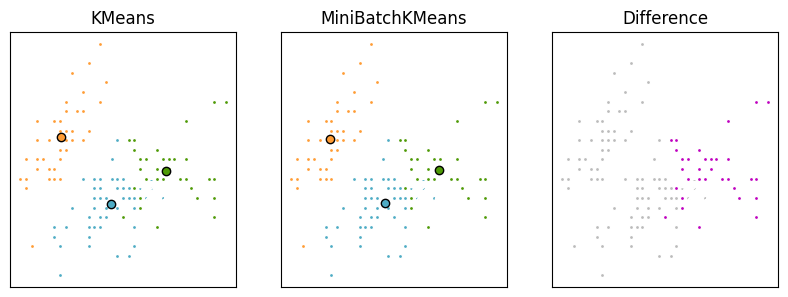

In [30]:
# Ejemplo 2

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_iris

# Cargar dataset de iris

iris = load_iris()
X = iris.data

n_clusters = 3

# Fit KMeans para el iris data
k_means = KMeans(n_clusters=n_clusters, random_state=0)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

# Fit MiniBatchKMeans para iris data
mbk = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
mbk.fit(X)
mbk_means_labels = mbk.labels_
mbk_means_cluster_centers = mbk.cluster_centers_

# Plotting
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())

# Plotting de las diferencias entre KMeans y MiniBatchKMeans
different = mbk_means_labels == 2
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identical = np.logical_not(different)
ax.plot(X[identical, 0], X[identical, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(X[different, 0], X[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

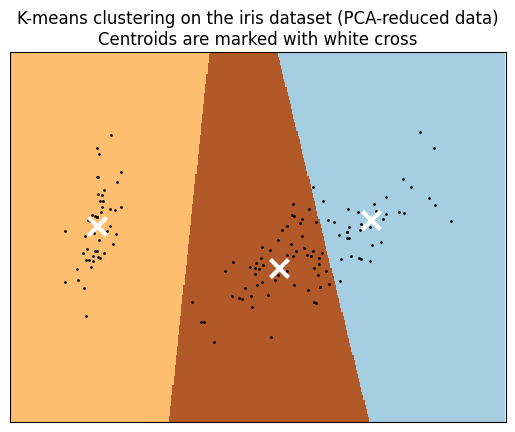

In [31]:
# Ejemplo 3

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Cargar dataset de iris

iris = load_iris()
data = iris.data

n_digits = 3

# Reducir la dimension de los datos a dos componentes usand PCA
reduced_data = PCA(n_components=2).fit_transform(data)

# Fit KMeans para los datos reducidos
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# El tamaño de los pasos para la malla
h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Labels de cada punto en la malla usando el modelo entrenado
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Poner el resultado en paleta de colores
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Mostrar los resultados como una x blanca
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title("K-means clustering on the iris dataset (PCA-reduced data)\nCentroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()